In [1]:
import pandas as pd
import sqlite3 as sql
conn=sql.connect('factbook.db')
query="SELECT * FROM sqlite_master WHERE type='table'"
pd.read_sql_query(query,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
head_query="SELECT * FROM facts LIMIT 5"
pd.read_sql_query(head_query,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [3]:
min_max='''
SELECT MIN(population),
       MAX(population),
       MIN(population_growth),
       MAX(population_growth)
FROM facts
'''
pd.read_sql_query(min_max,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [5]:
lowest_pop='''
SELECT name
FROM facts
WHERE population=(SELECT MIN(population) FROM facts)
'''
pd.read_sql_query(lowest_pop,conn)

,name
0,Antarctica


In [8]:
highest_pop='''
SELECT name
FROM facts
WHERE population=(SELECT MAX(population) FROM facts)
'''
pd.read_sql_query(highest_pop,conn)

,name
0,World


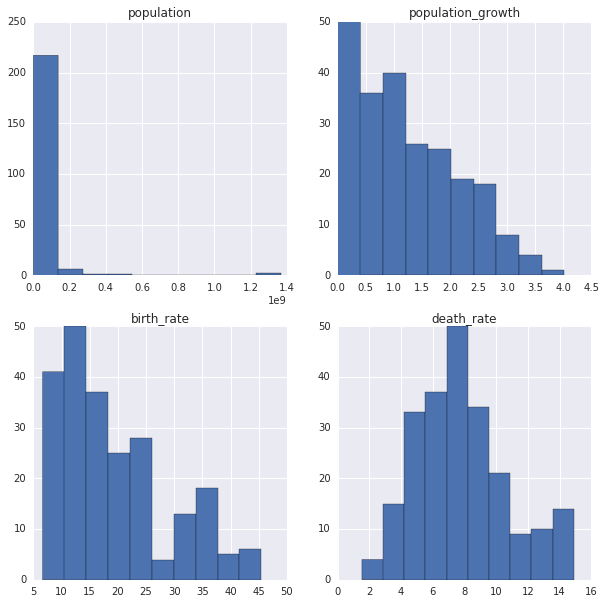

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))


q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
test=pd.read_sql_query(q6, conn)
test=test.dropna(how='any')
columns=['population','population_growth','birth_rate','death_rate']
for i in range(0,len(columns)):
    ax = fig.add_subplot(2,2,i+1)
    ax.hist(test[columns[i]])
    ax.set_title(columns[i])
plt.show()
